<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 데이터 및 라이브러리 로딩**

In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 데이터 불러오기
train=pd.read_csv("movies_train.csv")
test = pd.read_csv("movies_test.csv")
submission = pd.read_csv("submission.csv") # 제출용 파일

# **1. 데이터 탐색(EDA)**

## **1-1. 일부 데이터 미리보기**

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [6]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [7]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


## **1-2. 데이터 요약**

In [8]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


- 600개의 데이터로 모델을 학습시키고 243개의 영화의 관객수를 예측해야 하는 과제
- train에는 12개의 열이 있고, test에는 관객수(box_off_num)를 제외한 11개의 열이 존재함

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수  
(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수  
(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수(target 변수)

-> dir_prev_bfnum에 결측치가 많은 것을 확인할 수 있다.

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


-> dir_prev_bfnum에 결측치가 많은 것을 확인할 수 있다.

## **1-3. 데이터의 요약통계량 확인**

In [11]:
pd.options.display.float_format = '{:.1f}'.format # 소숫점 자리수 출력값 format 설정

In [12]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


- 영화에 따라 상영 시간은 다양한 것을 확인할 수 있다.
- dir_prev_bfnum은 왜곡된 분포를 가지고 있음을 확인할 수 있다.
  - 이상치가 존재할 가능성이 있음
- num_staff는 왜곡된 분포를 가지고 있음을 확인할 수 있다.
- target 변수(box_off_num) 또한 왜곡된 분포를 지니고 있음을 확인할 수 있다.

# **2. 데이터 전처리**

## **2-1. 결측치 확인**

In [13]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [14]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

- train과 test 모두 ```dir_prev_bfnum```(해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수) 변수에 결측값이 존재한다.

In [15]:
### 결측치가 있는 컬럼의 특성 확인

train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [16]:
test[test['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5


In [17]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
print(test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0
0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num(해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수)이 0인 영화들이다.
  - 즉, 감독의 이전 작품이 존재하지 않는 경우이다.
- 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [18]:
train['dir_prev_bfnum'].fillna(0, inplace = True)
test['dir_prev_bfnum'].fillna(0, inplace = True)

## **2-2. 데이터 타입 전처리**

- release_time은 시간에 관련된 데이터인데 ```int```형으로 인식되고 있다.
  - release_time을 ```datetime``` 형식으로 변환한다.

In [19]:
train['release_time'] = pd.to_datetime(train['release_time'])
test['release_time'] = pd.to_datetime(test['release_time'])

In [20]:
# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year'] = train['release_time'].dt.year # 년도
train['release_month'] = train['release_time'].dt.month # 월
train['release_day'] = train['release_time'].dt.day     # 일
train['release_weekday'] = train['release_time'].dt.weekday # 요일

test['release_year'] = test['release_time'].dt.year # 년도
test['release_month'] = test['release_time'].dt.month # 월
test['release_day'] = test['release_time'].dt.day     # 일
test['release_weekday'] = test['release_time'].dt.weekday # 요일

In [21]:
# 기존의 release_time은 제거하기

train = train.drop('release_time', axis = 1)
test = test.drop('release_time', axis = 1)

In [22]:
train.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2
3,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7,12,3
4,불량남녀,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11,4,3


In [23]:
test.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,release_year,release_month,release_day,release_weekday
0,용서는 없다,시네마서비스,느와르,125,청소년 관람불가,김형준,300529.0,2,304,3,2010,1,7,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,113,12세 관람가,이광재,342700.2,4,275,3,2010,1,14,3
2,하모니,CJ 엔터테인먼트,드라마,115,12세 관람가,강대규,4206610.7,3,419,7,2010,1,28,3
3,의형제,(주)쇼박스,액션,116,15세 관람가,장훈,691342.0,2,408,2,2010,2,4,3
4,평행 이론,CJ 엔터테인먼트,공포,110,15세 관람가,권호영,31738.0,1,380,1,2010,2,18,3


## **2-3. 피처 선택 & 가공(Feature Selection & Engineering)**

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수  
(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수  
(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- release_year : 개봉년도
- release_month: 개봉월
- release_day: 개봉일
- release_weekday: 개봉요일
- box_off_num : 관객수(target 변수)

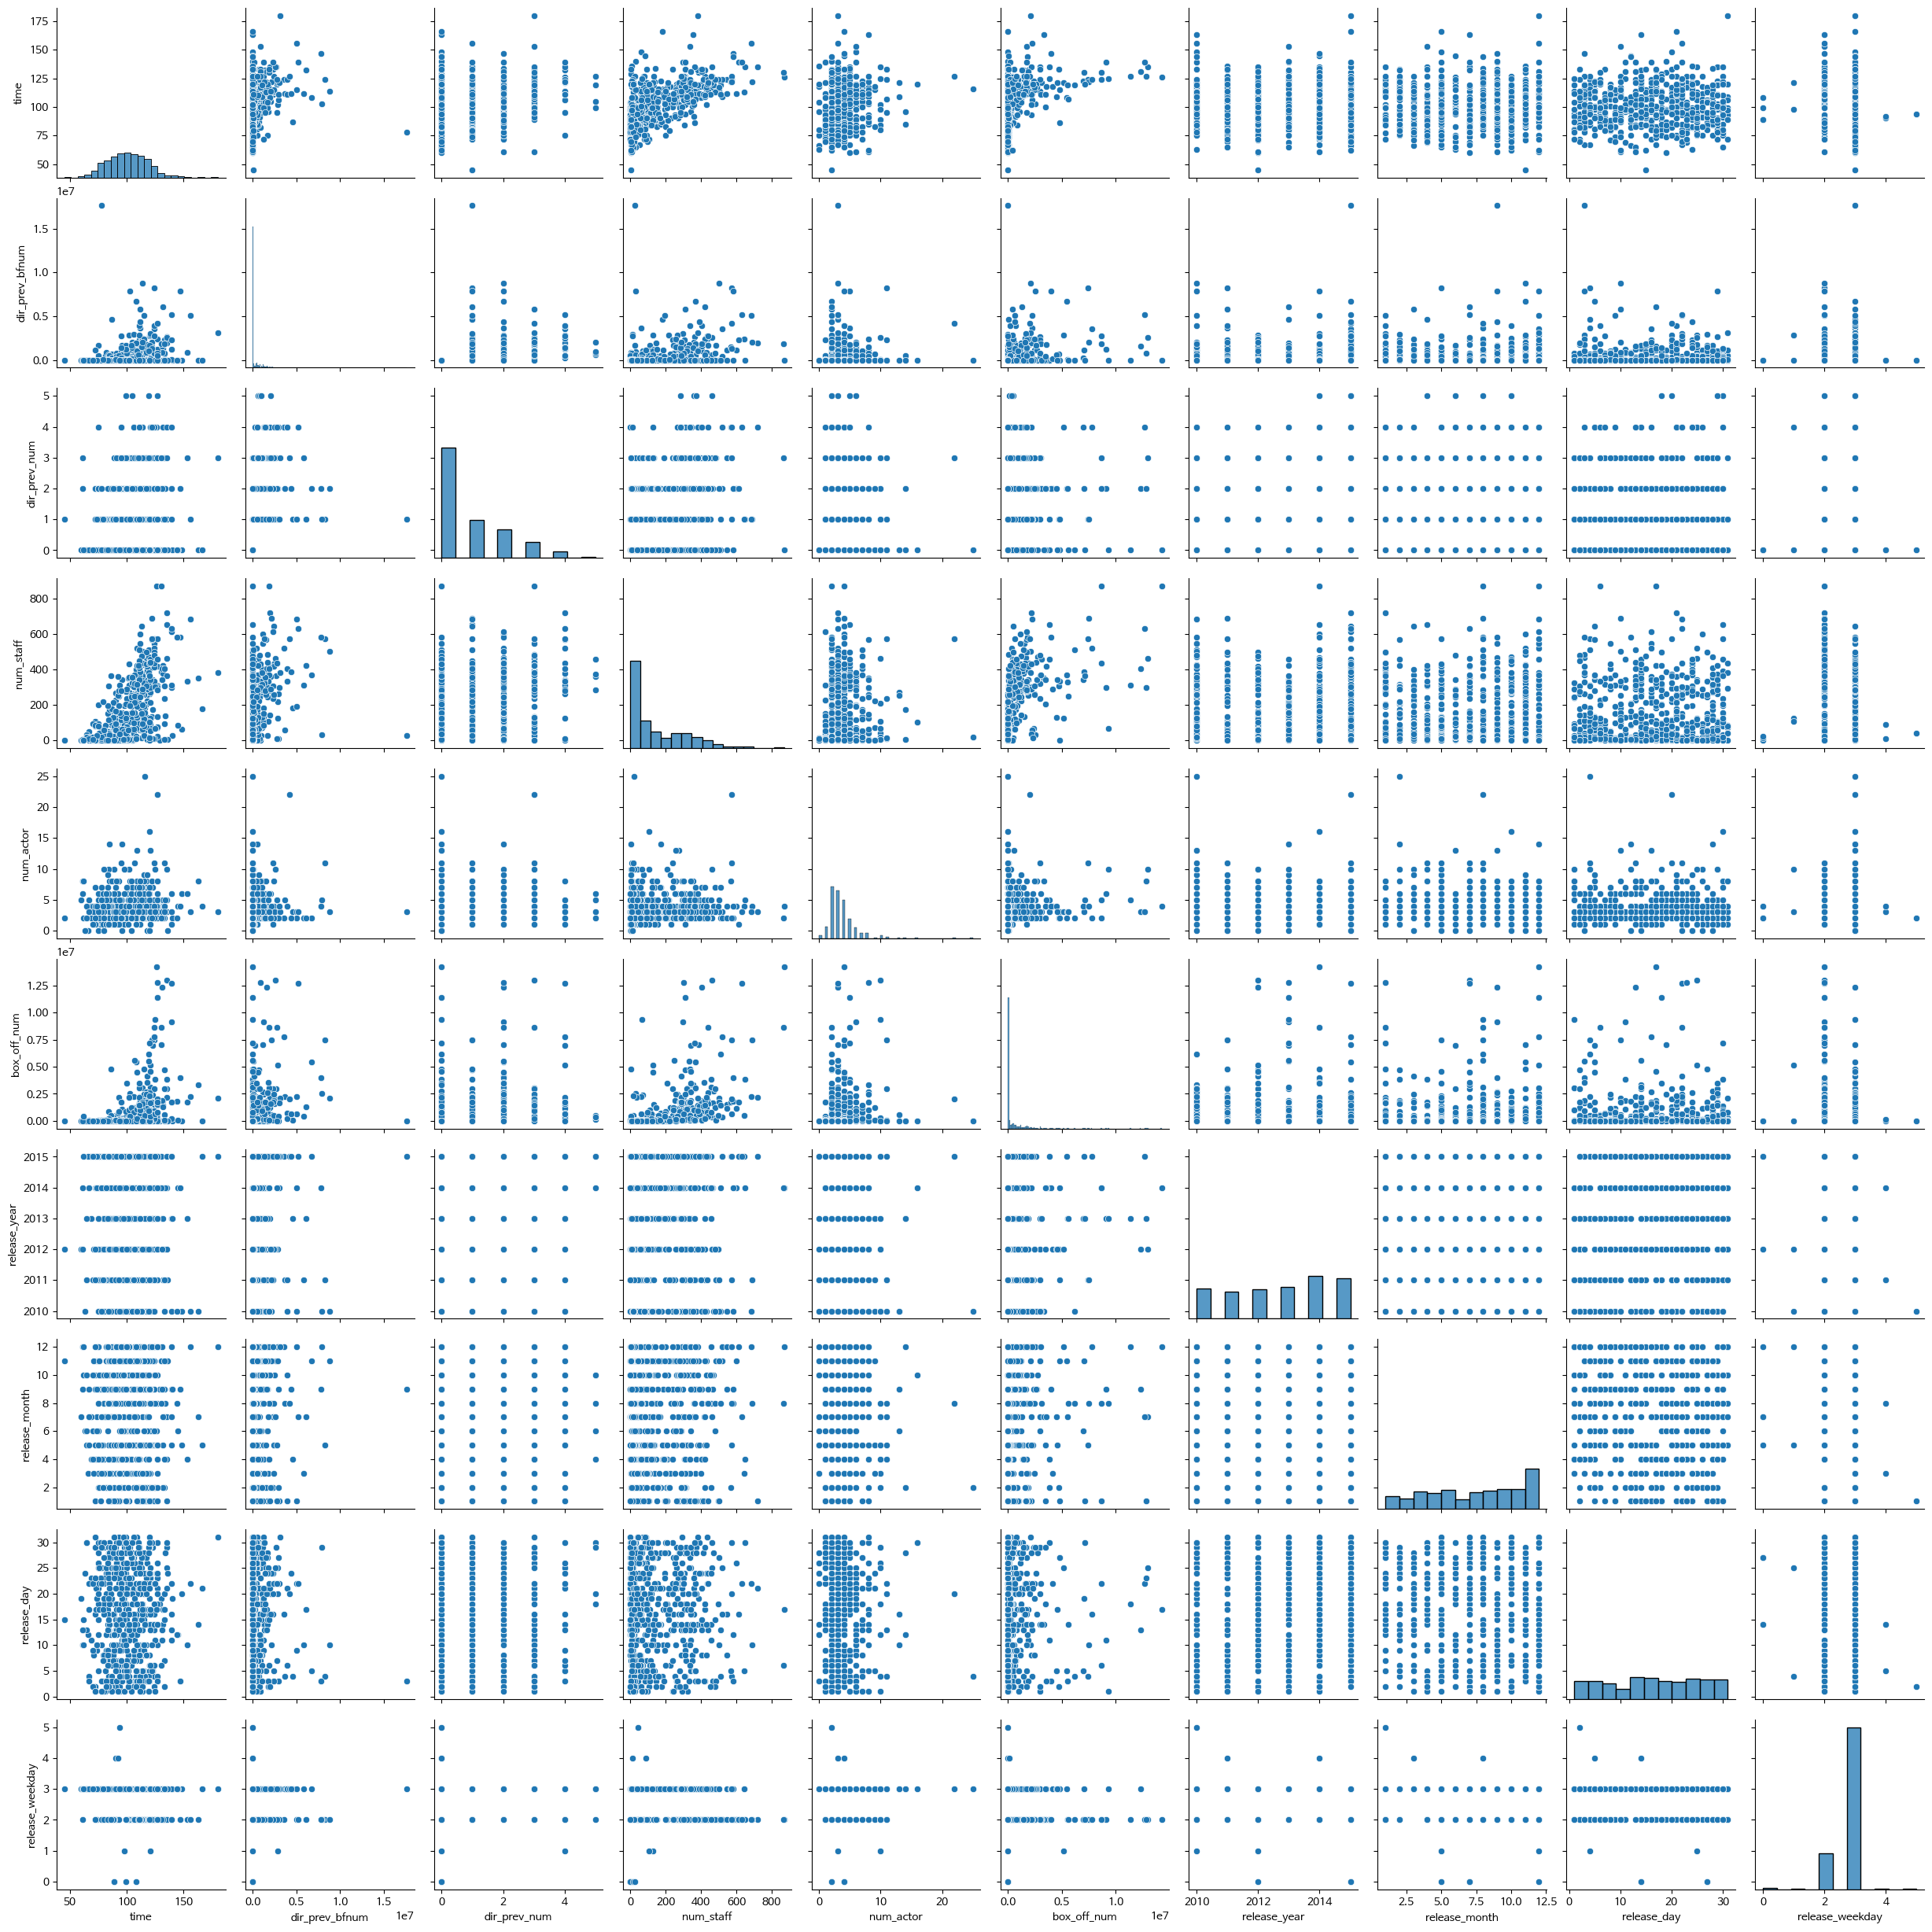

In [24]:
sns.pairplot(data = train)
plt.show()

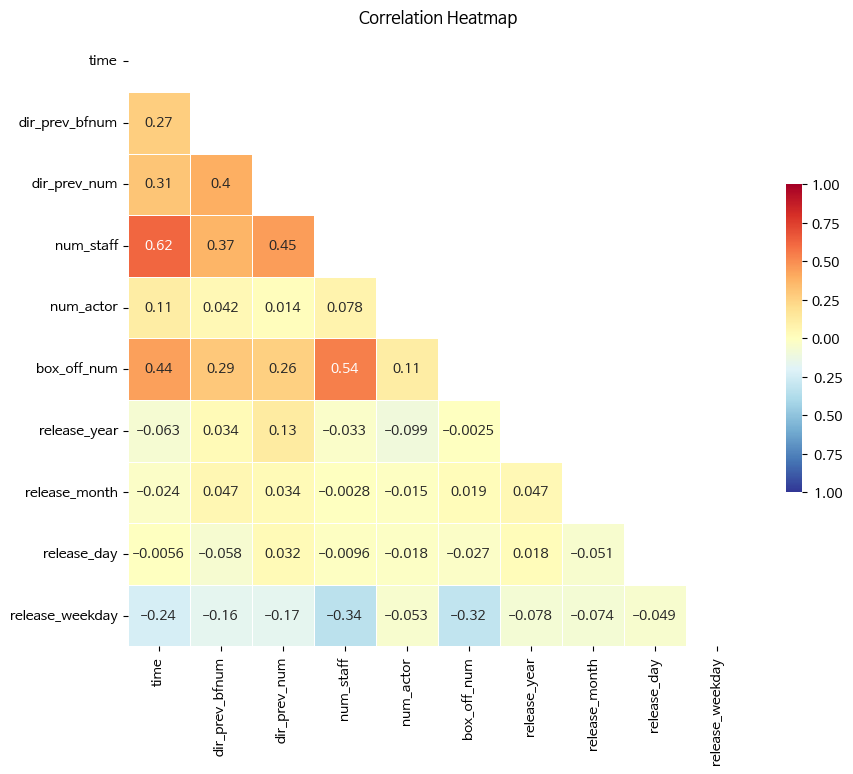

In [25]:
### 상관계수 시각화
# 영화 관객수와 관련 있는 변수 파악

corr = train.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (10,8))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr,
            cmap = 'RdYlBu_r',
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면을 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )

plt.title('Correlation Heatmap')
plt.show()

- 영화 관객수(box_off_num)과 상관도가 높은 변수
  - 스텝수(num_staff): 0.54
  - 상영시간(time): 0.44
  - 개봉요일(release_weekday): -0.32
- ```상영시간(time)```과 ```스텝수(num_staff)```는 서로 상관도가 높은 변수들임(상관계수: 0.62)
  - 현재 문제의 경우 '영화 관객수 예측'이 목적이기에 **예측적** 회귀분석이라고 할 수 있음
  - 예측적 회귀분석의 경우 모델의 예측 성능만 잘 나온다면 굳이 다중공선성 문제를 해결하지 않아도 된다.
  - [다중공선성](https://ysyblog.tistory.com/171)

### **a) 영화 제목(title)**

In [26]:
# 영화 제목은 영화마다 모두 다름
# 영화의 관객수와 그닥 관련이 없을 것이라 판단되기에 제거

train = train.drop(['title'], axis= 1)
test = test.drop(['title'], axis= 1)

In [27]:
train.head(3)

,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday
0,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3
1,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3
2,(주)쇼박스,액션,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2


In [28]:
test.head(3)

,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,release_year,release_month,release_day,release_weekday
0,시네마서비스,느와르,125,청소년 관람불가,김형준,300529.0,2,304,3,2010,1,7,3
1,(주)쇼박스,멜로/로맨스,113,12세 관람가,이광재,342700.2,4,275,3,2010,1,14,3
2,CJ 엔터테인먼트,드라마,115,12세 관람가,강대규,4206610.7,3,419,7,2010,1,28,3


### **b) 배급사(distributor)**

In [29]:
### 배급사(distributor) 분포 확인

train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

- 너무 세분화되어 있음을 확인할 수 있다.
  - 상위 5개의 배급사를 제외하고 모두 기타로 처리

In [30]:
# 상위 5개의 배급사를 제외하고 '기타'로 처리

distributor_list = train.distributor.value_counts()[:5]

def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [31]:
### 배급사(distributor) 분포 재확인

train.distributor.value_counts()

기타           409
CJ 엔터테인먼트     54
롯데엔터테인먼트      52
(주)NEW        30
(주)마운틴픽쳐스     29
(주)쇼박스        26
Name: distributor, dtype: int64

### **c) 장르(genre)**

In [32]:
### 장르 분포 확인

train.genre.value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

- 너무 세분화되어 있음을 확인할 수 있다.
  - 상위 5개의 장르를 제외하고 모두 기타로 처리

In [33]:
# 상위 5개의 장르를 제외하고 '기타'로 처리

genre_list = train.genre.value_counts()[:5]

def func2(genre):
    if genre in genre_list:
        return genre
    else:
        return '기타'

train['genre'] = train['genre'].apply(lambda x : func2(x))
test['genre'] = test['genre'].apply(lambda x : func2(x))

In [34]:
### 장르 분포 재확인

train.genre.value_counts()

드라마       221
기타        113
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
Name: genre, dtype: int64

### **d) 상영시간(time)**

<Axes: xlabel='time', ylabel='box_off_num'>

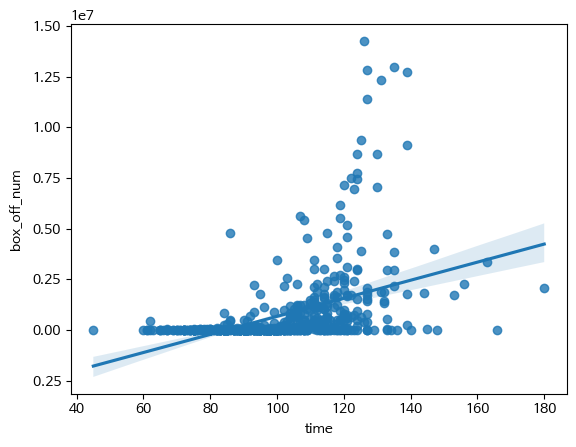

In [35]:
sns.regplot(data = train, x = 'time', y = 'box_off_num')

- 120~140분 사이의 영화가 많은 관객수를 모은 것을 볼 수 있다.
- 140분 이상은 데이터 수 자체가 너무 적다.

### **e) 상영등급(screening_rat)**

In [36]:
### 상영등급 분포 확인

train.screening_rat.value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

- 연령대별로 영화 수가 고르게 분포되어 있다.

### **f) 감독 이름(director)**

In [37]:
# 너무 다양해서 제거

train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

### **g) dir_prev_bfnum**

In [38]:
### 분포 확인

train.dir_prev_bfnum.value_counts()

0.0          330
145.0          3
891.0          3
984.0          3
2270048.5      2
            ... 
1556.0         1
35348.0        1
1949111.0      1
7.0            1
496061.0       1
Name: dir_prev_bfnum, Length: 246, dtype: int64

In [39]:
# 감독의 이전 영화에서의 평균 관객수는 대부분 알려지지 않음
# 의미가 없는 변수로 판단되기에 제거

train = train.drop(['dir_prev_bfnum'],axis = 1)
test = test.drop(['dir_prev_bfnum'],axis = 1)

### **h) dir_prev_num**

In [40]:
### 분포 확인

train.dir_prev_num.value_counts()

0    330
1    113
2     86
3     47
4     20
5      4
Name: dir_prev_num, dtype: int64

- 주로 2개 이하임을 확인할 수 있음

<Axes: xlabel='dir_prev_num', ylabel='box_off_num'>

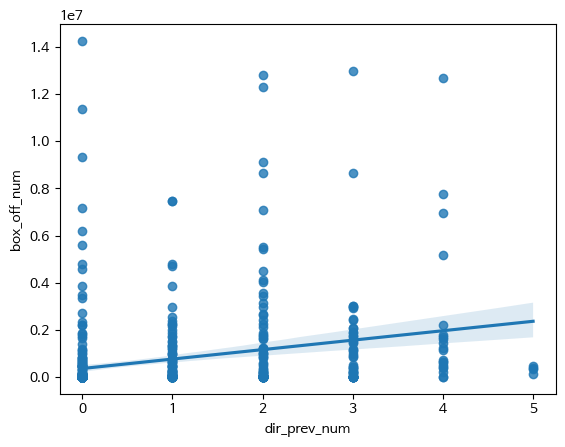

In [41]:
sns.regplot(data = train, x = 'dir_prev_num', y = 'box_off_num')

- 이전에 참여한 영화의 수가 많을수록 영화 관객수가 많아지는 경향이 있다..?

### **i) 스텝 수(num_staff)**

<Axes: xlabel='num_staff', ylabel='box_off_num'>

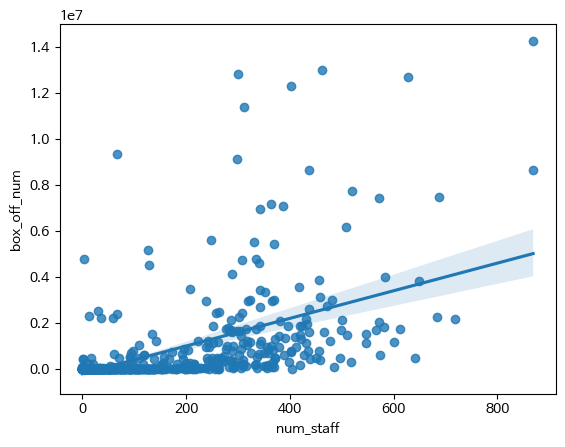

In [42]:
sns.regplot(data = train, x = 'num_staff', y = 'box_off_num')

- 스텝 수에 따라 영화 관객 수가 많아지는 경향이 있다고 할 수 있다.

### **j) 주연배우수(num_actor)**

In [43]:
train.num_actor.value_counts()

2     154
3     143
4     114
5      58
1      35
6      33
7      16
8      16
0       9
10      8
11      4
9       3
14      2
13      2
25      1
22      1
16      1
Name: num_actor, dtype: int64

- 대부분 주연 배우수는 5명 이하

<Axes: xlabel='num_actor', ylabel='box_off_num'>

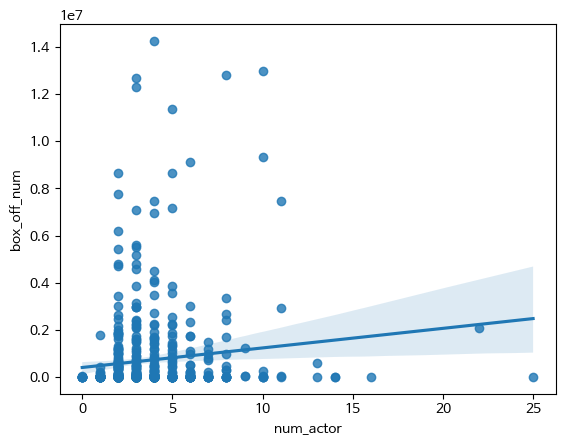

In [44]:
sns.regplot(data = train, x = 'num_actor', y = 'box_off_num')

### **k) 개봉년도(release_year)**

In [45]:
# 개봉년도와 영화 관객수에는 큰 연관성이 없어 보임
# 해당 변수를 제거

train = train.drop('release_year', axis= 1)
test = test.drop('release_year', axis= 1)

### **l) 개봉월(release_month)**

In [46]:
train.release_month.value_counts()

11    72
10    60
9     60
5     57
8     55
3     52
7     49
12    49
4     47
1     39
2     31
6     29
Name: release_month, dtype: int64

<Axes: xlabel='release_month', ylabel='box_off_num'>

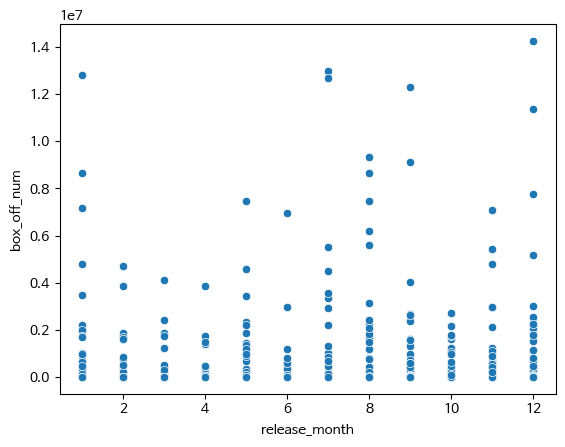

In [47]:
sns.scatterplot(data = train, x = 'release_month', y = 'box_off_num')

- 월마다 개봉작 수가 매우 고르게 분포하고 있음
- 월에 따른 영화 관객수 차이는 없는 것으로 판단된다.
  - 그러면 계절별로는?

In [48]:
def get_season(x):
  if x == 3 or x == 4 or x == 5:
    return 'spring'
  elif x == 6 or x == 7 or x == 8:
    return 'summer'
  elif x == 9 or x == 10 or x == 11:
    return 'autumn'
  else:
    return 'winter'

In [49]:
train['release_season'] = train['release_month'].apply(get_season)

In [50]:
train.release_season.value_counts()

autumn    192
spring    156
summer    133
winter    119
Name: release_season, dtype: int64

- 계절마다 개봉작 수가 매우 고르게 분포하고 있음
- 계절에 따른 영화 관객수 차이는 없는 것으로 판단된다.

In [51]:
### 월, 계절에 관련된 컬럼들을 모두 제거

train = train.drop(['release_month', 'release_season'], axis= 1)
test = test.drop(['release_month'], axis= 1)

### **m) 개봉일(release_day)**

In [52]:
# 개봉년도와 영화 관객수에는 큰 연관성이 없어 보임
# 해당 변수를 제거

train = train.drop('release_day', axis= 1)
test = test.drop('release_day', axis= 1)

### **n) 개봉 요일(release_weekday)**

In [53]:
train.release_weekday.value_counts()

3    484
2    107
0      4
4      2
1      2
5      1
Name: release_weekday, dtype: int64

- 개봉 요일에 따라 영화 관객수에 차이가 있음을 확인할 수 있다.
- 대부분 개봉요일이 수, 목임
  - 수, 목, 나머지로 분류

In [54]:
def get_day(x):
  if x == 2:
    return 'wed'
  elif x == 3:
    return 'thur'
  else:
    return 'etc'

In [55]:
train['release_weekday'] = train['release_weekday'].apply(get_day)
test['release_weekday'] = test['release_weekday'].apply(get_day)

In [56]:
train.release_weekday.value_counts()

thur    484
wed     107
etc       9
Name: release_weekday, dtype: int64

<Axes: xlabel='release_weekday', ylabel='box_off_num'>

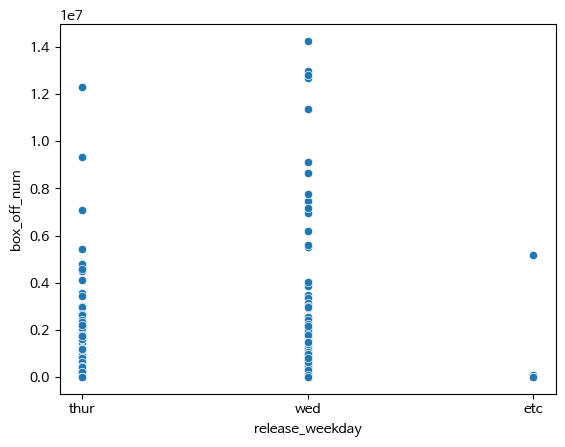

In [57]:
sns.scatterplot(data = train, x = 'release_weekday', y = 'box_off_num')

### **📌 최종 변수 확인**

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   distributor      600 non-null    object
 1   genre            600 non-null    object
 2   time             600 non-null    int64 
 3   screening_rat    600 non-null    object
 4   dir_prev_num     600 non-null    int64 
 5   num_staff        600 non-null    int64 
 6   num_actor        600 non-null    int64 
 7   box_off_num      600 non-null    int64 
 8   release_weekday  600 non-null    object
dtypes: int64(5), object(4)
memory usage: 42.3+ KB


- distributor: 배급사
- genre: 장르
- time: 상영시간(분)
- screening_rat: 상영등급
- dir_prev_num: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수
- num_staff: 스텝수
- num_actor: 주연배우수
- release_weekday: 개봉요일
- box_off_num: 관객수(target 변수)

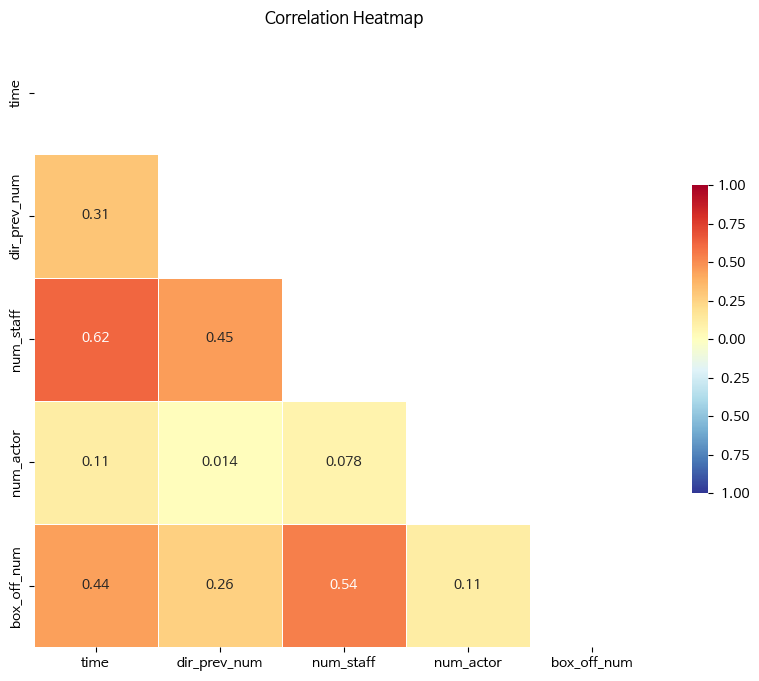

In [59]:
### 상관계수 재확인

corr = train.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (10,8))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr,
            cmap = 'RdYlBu_r',
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면을 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )

plt.title('Correlation Heatmap')
plt.show()

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   distributor      243 non-null    object
 1   genre            243 non-null    object
 2   time             243 non-null    int64 
 3   screening_rat    243 non-null    object
 4   dir_prev_num     243 non-null    int64 
 5   num_staff        243 non-null    int64 
 6   num_actor        243 non-null    int64 
 7   release_weekday  243 non-null    object
dtypes: int64(4), object(4)
memory usage: 15.3+ KB


## **2-4. 데이터 분포 확인**
- 선형 회귀 모델과 같은 선형 모델의 경우 일반적으로 피처와 타깃값 간에 선형의 관계가 있다고 가정하고, 최적의 선형함수를 찾아내 결과값을 예측
  - feature와 target 데이터의 분포가 **정규 분포** 형태인 것을 선호

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'dir_prev_num'}>],
       [<Axes: title={'center': 'num_staff'}>,
        <Axes: title={'center': 'num_actor'}>],
       [<Axes: title={'center': 'box_off_num'}>, <Axes: >]], dtype=object)

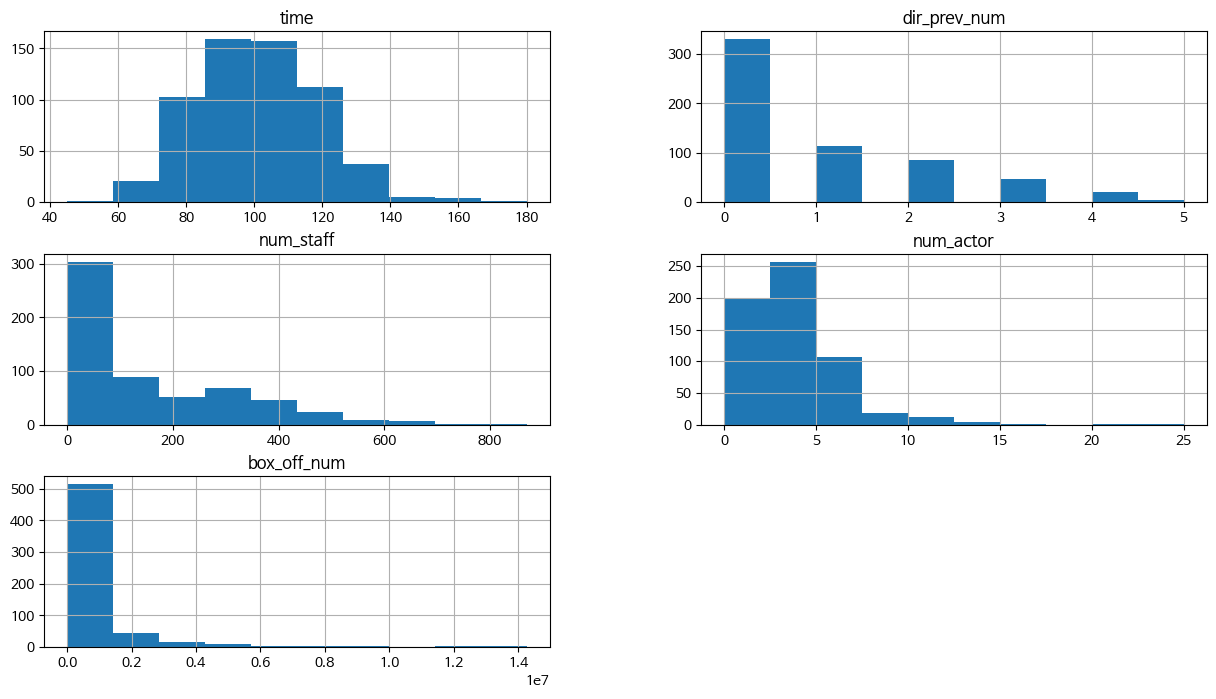

In [61]:
train.hist(figsize = (15,8))

<Axes: xlabel='release_weekday', ylabel='count'>

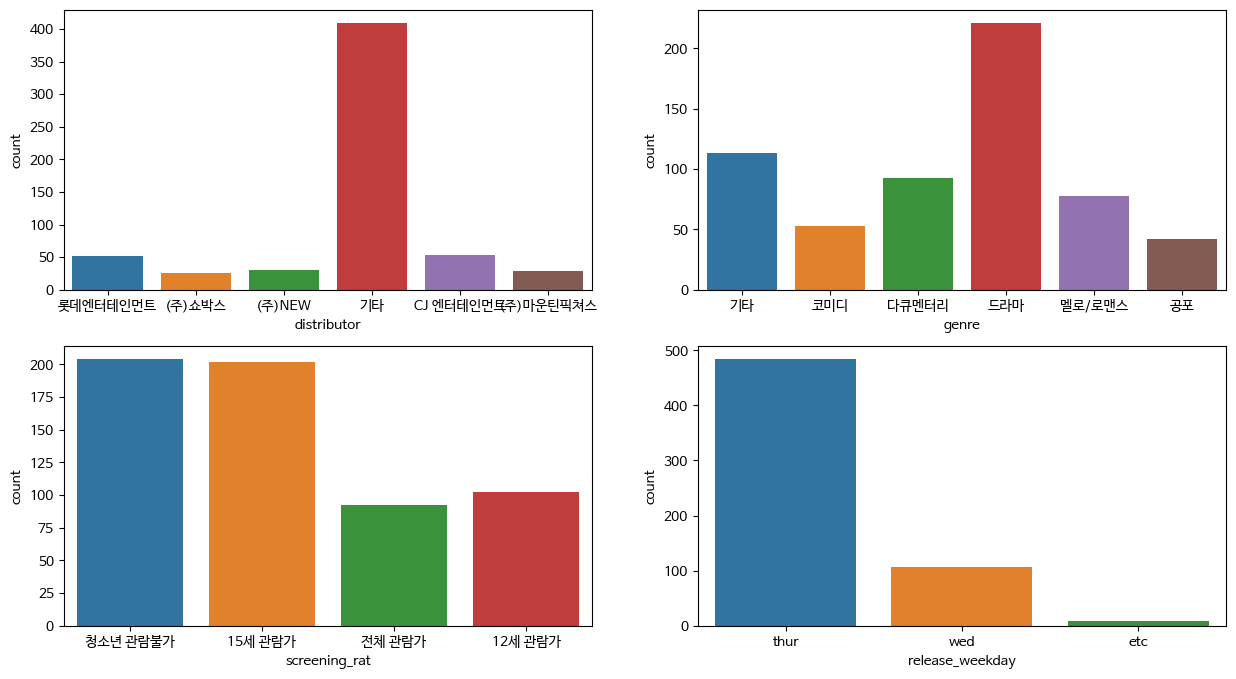

In [62]:
plt.figure(figsize = (15,8))

plt.subplot(2,2,1)
sns.countplot(x = train['distributor'])

plt.subplot(2,2,2)
sns.countplot(x = train['genre'])

plt.subplot(2,2,3)
sns.countplot(x = train['screening_rat'])

plt.subplot(2,2,4)
sns.countplot(x = train['release_weekday'])

- 데이터가 왜곡된 분포를 가지고 있음
- feature 변수의 경우 주로 **피처 스케일링**을 시도
- target 변수의 경우 주로 **로그 변환**을 수행
  - 원본 값에 로그 함수(```log1p()```)를 적용해 보다 정규분포에 가까운 형태로 값의 분포를 변경
  - 예측 후 원래 값으로 되돌리기 위해 ```np.expm1()``` 함수 활용

## **2-5. feature, target 분리**

In [63]:
X_train = train.drop(['box_off_num'],axis= 1)
y_train = train['box_off_num']

In [64]:
X_train.head(3)

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,release_weekday
0,롯데엔터테인먼트,기타,96,청소년 관람불가,0,91,2,thur
1,(주)쇼박스,기타,130,청소년 관람불가,2,387,3,thur
2,(주)쇼박스,기타,123,15세 관람가,4,343,4,wed


In [65]:
y_train.head(3)

0      23398
1    7072501
2    6959083
Name: box_off_num, dtype: int64

In [66]:
X_test = test

## **2-6. Feature Scaling**
- feature 변수들 간의 스케일 차이가 존재
  - 표준화(StandardScaler) 진행
- 범주형 변수들의 경우 스케일링 대상이 아님
  - 이를 제외하고 스케일링 진행

In [67]:
### 스케일링
# 원본 데이터 유지를 위해 복사 후 스케일링 진행

X_train_stan = X_train.copy()
X_test_stan = X_test.copy()

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stan_fit = scaler.fit(X_train[['time', 'dir_prev_num', 'num_staff', 'num_actor']])
X_train_stan[['time', 'dir_prev_num', 'num_staff', 'num_actor']] = stan_fit.transform(X_train[['time', 'dir_prev_num', 'num_staff', 'num_actor']])
X_test_stan[['time', 'dir_prev_num', 'num_staff', 'num_actor']] = stan_fit.transform(X_test[['time', 'dir_prev_num', 'num_staff', 'num_actor']])

In [69]:
X_train_stan.head(3)

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,release_weekday
0,롯데엔터테인먼트,기타,-0.3,청소년 관람불가,-0.7,-0.4,-0.7,thur
1,(주)쇼박스,기타,1.6,청소년 관람불가,1.0,1.4,-0.3,thur
2,(주)쇼박스,기타,1.2,15세 관람가,2.6,1.2,0.1,wed


In [70]:
X_test_stan.head(3)

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,release_weekday
0,기타,기타,1.3,청소년 관람불가,1.0,0.9,-0.3,thur
1,(주)쇼박스,멜로/로맨스,0.7,12세 관람가,2.6,0.7,-0.3,thur
2,CJ 엔터테인먼트,드라마,0.8,12세 관람가,1.8,1.6,1.3,thur


## **2-7. 데이터 왜곡 처리**
- target 변수가 왜곡된 분포를 가지고 있음
  - 로그 변환 수행

In [71]:
y_train = np.log1p(y_train)
y_train

0     10.1
1     15.8
2     15.8
3     12.3
4     13.1
      ... 
595   14.2
596   14.4
597    7.8
598   14.6
599   15.8
Name: box_off_num, Length: 600, dtype: float64

## **2-8. 범주형 변수 처리**
- 범주형 변수에 대해 원핫 인코딩 수행

In [72]:
# 원핫 인코딩

X_train_stan = pd.get_dummies(data = X_train_stan, columns = ['distributor', 'genre','screening_rat','release_weekday'], prefix = ['distributor', 'genre','screening_rat','release_weekday'])
X_test_stan = pd.get_dummies(data = X_test_stan, columns = ['distributor', 'genre','screening_rat','release_weekday'], prefix = ['distributor', 'genre','screening_rat','release_weekday'])

In [73]:
X_train_stan.head(3)

,time,dir_prev_num,num_staff,num_actor,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,distributor_기타,distributor_롯데엔터테인먼트,...,genre_드라마,genre_멜로/로맨스,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,release_weekday_etc,release_weekday_thur,release_weekday_wed
0,-0.3,-0.7,-0.4,-0.7,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,1.6,1.0,1.4,-0.3,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1.2,2.6,1.2,0.1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [156]:
X_test_stan

,time,dir_prev_num,num_staff,num_actor,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,distributor_기타,distributor_롯데엔터테인먼트,...,genre_드라마,genre_멜로/로맨스,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,release_weekday_etc,release_weekday_thur,release_weekday_wed
0,1.3,1.0,0.9,-0.3,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.7,2.6,0.7,-0.3,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0.8,1.8,1.6,1.3,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0.8,1.0,1.6,-0.7,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.5,0.1,1.4,-1.1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,-1.3,0.1,-0.9,0.1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
239,-0.8,-0.7,-0.8,-0.7,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
240,0.3,-0.7,0.4,0.1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
241,0.1,0.1,-0.5,1.3,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0


#### 미니프로젝트

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {} # 빈 딕셔너리

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_,pred,actual): # parameter: 모델명, 예측값, 실제값
  df = pd.DataFrame({'prediction' : pred,'actual': y_test})
  df = df.sort_values(by = 'actual').reset_index(drop = True)

  plt.figure(figsize = (12,9))
  plt.scatter(df.index,df['prediction'],marker = 'x',color = 'r')
  plt.scatter(df.index,df['actual'],alpha = 0.7,marker = 'o',color = 'black')
  plt.title(name_,fontsize = 15)
  plt.legend(['prediction','actual'],fontsize = 12)
  plt.show()

def rmse_eval(name_,pred,actual):
  global my_predictions
  global colors

  plot_predictions(name_,pred,actual)

  rmse = np.sqrt(mean_squared_error(pred,actual))
  my_predictions[name_] = rmse

  y_value = sorted(my_predictions.items(),key = lambda x: x[1],reverse = True) # 내림차순 정렬

  df = pd.DataFrame(y_value, columns = ['model','rmse'])
  print(df)

  # 상한, 하한 설정
  min_ = df['rmse'].min() - 10
  max_ = df['rmse'].max() + 10

  length = len(df)

  plt.figure(figsize = (10,length))
  ax = plt.subplot() # subplot 객체
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'],fontsize = 15)
  bars = ax.barh(np.arange(len(df)),df['rmse'])

  for i,v in enumerate(df['rmse']): # 인덱스, value
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2,i,str(round(v,3)),color = 'k',fontsize = 15,fontweight = 'bold')

  plt.title('RMSE Error',fontsize = 18)
  plt.xlim(min_,max_)

  plt.show()

In [80]:
from sklearn.model_selection import train_test_split
X_train_stan, X_test_stan, y_train, y_test = train_test_split(X_train_stan, y_train, test_size = 0.2, random_state=0)

# 결정트리


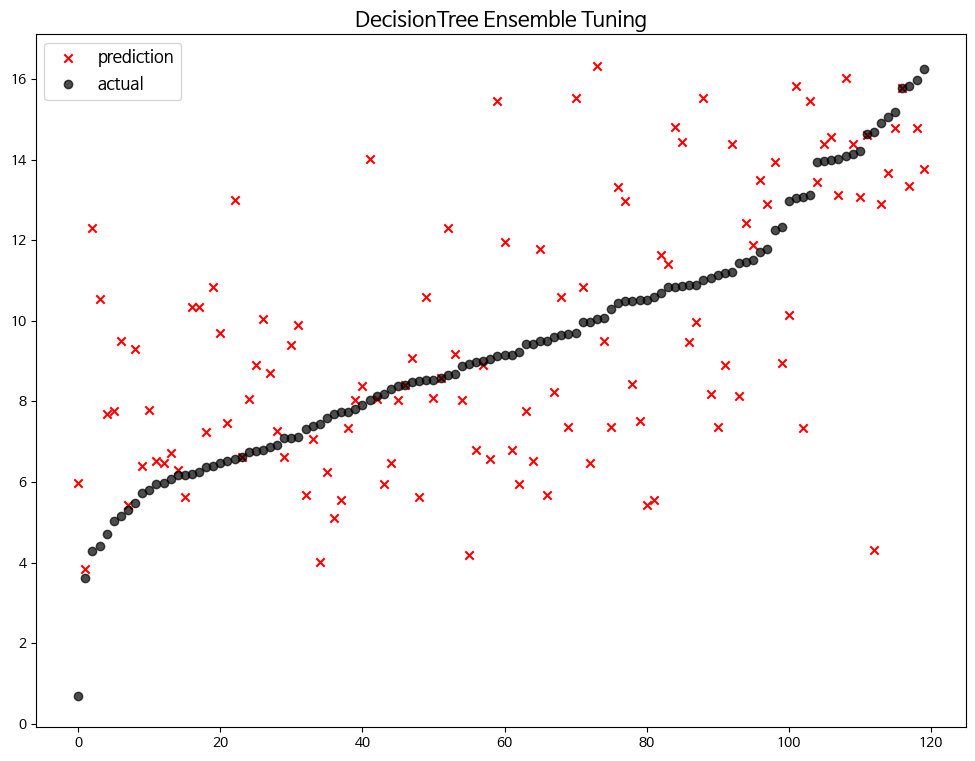

                          model  rmse
0  DecisionTree Ensemble Tuning   3.0
1  RandomForest Ensemble Tuning   2.2


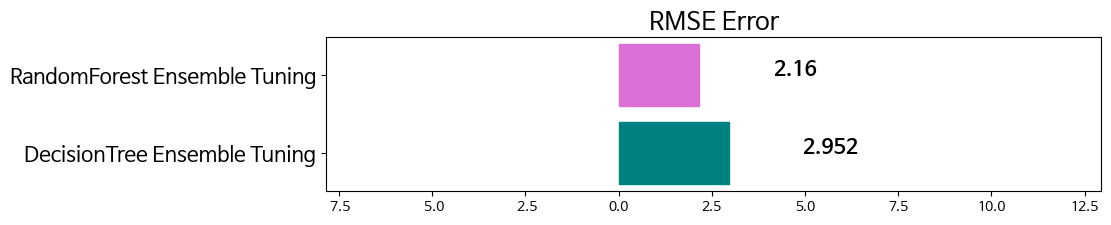

In [87]:
from sklearn.tree import DecisionTreeClassifier,  DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train_stan, y_train)
dt_pred = dt.predict(X_test_stan)
rmse_eval('DecisionTree Ensemble Tuning',dt_pred,y_test)

##### 제출파일 생성

In [88]:
pred_df = pd.DataFrame(dt_pred)
submission['box_off_num'] = pred_df
submission.to_csv('submission_pred_dt.csv',index = False)

##### 제출 결과 1987081.7474882987

# 랜덤포레스트


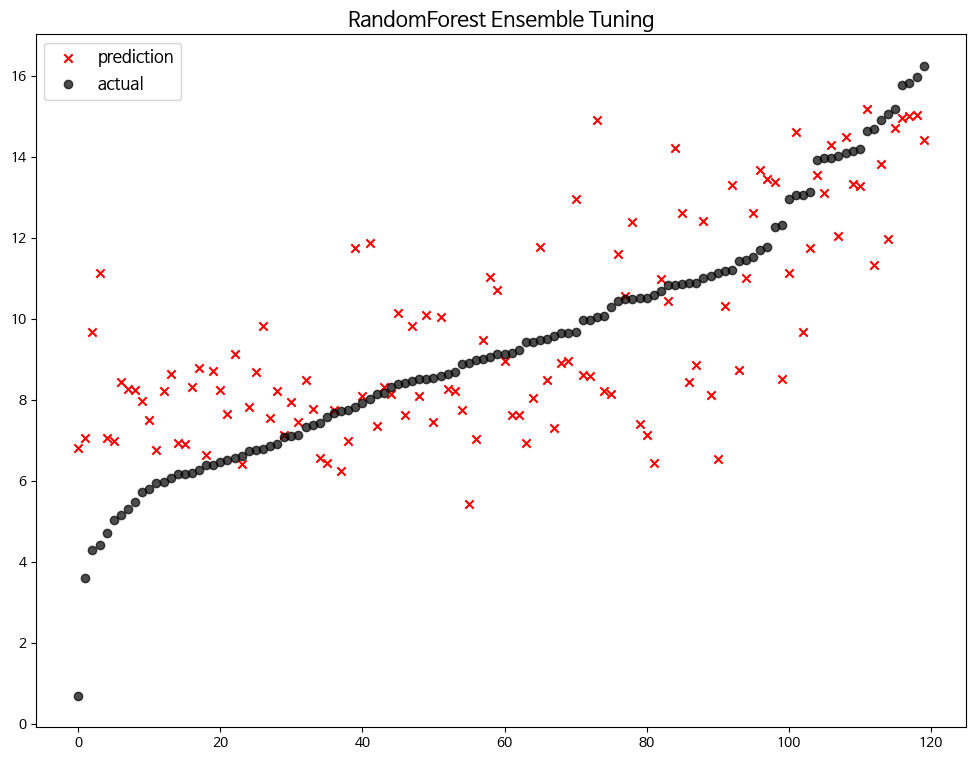

                          model  rmse
0  RandomForest Ensemble Tuning   2.2


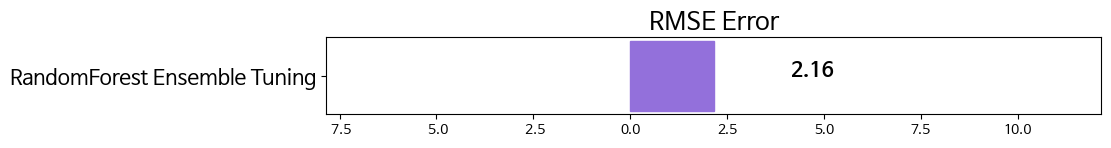

In [82]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train_stan,y_train)
rfr_pred = rfr.predict(X_test_stan)
rmse_eval('RandomForest Ensemble Tuning',rfr_pred,y_test)

##### 제출파일 생성

In [85]:
pred_df = pd.DataFrame(rfr_pred)
submission['box_off_num'] = pred_df
submission.to_csv('submission_pred.csv',index = False)

##### 제출 결과 1987081.784411797